# **Unsupervised Learning**
## Segmenting Shopping Mall Customers

In [24]:
import pandas as pd

# Load the dataset and take a look
df = pd.read_csv('mallcustomers.csv')
print(df.head())

   CustomerID  Gender  Age      Income  SpendingScore
0           1    Male   19  15,000 USD             39
1           2    Male   21  15,000 USD             81
2           3  Female   20  16,000 USD              6
3           4  Female   23  16,000 USD             77
4           5  Female   31  17,000 USD             40


In [4]:
# Convert Income from string to numeric
# Remove commas and "USD" from the Income column
df['Income'] = df['Income'].str.replace(',', '').str.replace('USD', '').astype(float)

In [5]:
# Create new dataset with only the features needed for k-means
clustering_data = df[['Income', 'SpendingScore']].copy()

print("Features selected for clustering:")
print(clustering_data.head())

Features selected for clustering:
    Income  SpendingScore
0  15000.0             39
1  15000.0             81
2  16000.0              6
3  16000.0             77
4  17000.0             40


In [6]:
# Run summary statistics
print("Summary Statistics for Income and SpendingScore:")
print(clustering_data.describe())


Summary Statistics for Income and SpendingScore:
              Income  SpendingScore
count     200.000000     200.000000
mean    60560.000000      50.200000
std     26264.721165      25.823522
min     15000.000000       1.000000
25%     41500.000000      34.750000
50%     61500.000000      50.000000
75%     78000.000000      73.000000
max    137000.000000      99.000000


In [7]:
# Z-score normalization (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

In [8]:
# Convert back to DataFrame for a clearer picture
normalized_df = pd.DataFrame(normalized_data, columns=['Income_normalized', 'SpendingScore_normalized'])

In [13]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Elbow Method to determine optimal number of clusters
wcss = []  # Within-cluster sum of squares
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

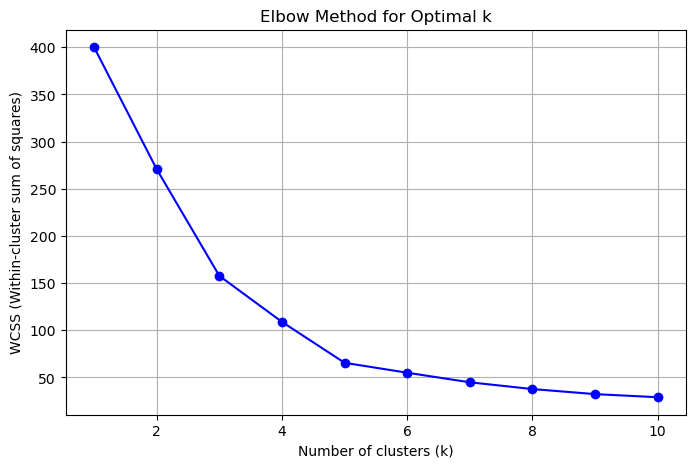

In [14]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.grid(True)
plt.show()

In [15]:
print("WCSS values for each k:")
for i, k in enumerate(k_range):
    print(f"k={k}: WCSS={wcss[i]:.2f}")

WCSS values for each k:
k=1: WCSS=400.00
k=2: WCSS=270.70
k=3: WCSS=157.70
k=4: WCSS=108.92
k=5: WCSS=65.57
k=6: WCSS=55.06
k=7: WCSS=44.91
k=8: WCSS=37.74
k=9: WCSS=32.38
k=10: WCSS=29.09


In [16]:
# Based on elbow method, choose optimal k (typically where the "elbow" occurs)
optimal_k = 4  # You can adjust this based on your elbow plot
print(f"\nChosen optimal k: {optimal_k}")

# Apply final K-means clustering with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(normalized_data)



Chosen optimal k: 4



Cluster distribution:
Cluster
0     23
1     39
2     38
3    100
Name: count, dtype: int64


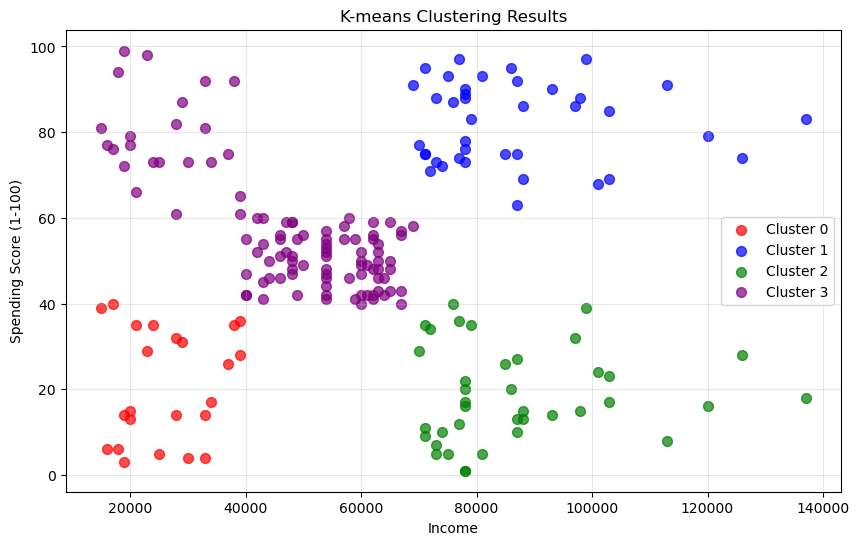


Clustering complete! Clusters visualized using original (non-normalized) data for easier interpretation.


In [17]:
# Add cluster labels to original data
df['Cluster'] = cluster_labels

print(f"\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())

# Visualize the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Income'], cluster_data['SpendingScore'], 
               c=colors[i], label=f'Cluster {i}', alpha=0.7, s=50)

plt.xlabel('Income')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering Results')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nClustering complete! Clusters visualized using original (non-normalized) data for easier interpretation.")

In [18]:
#Evaluating the Clusters

# Create dummy variables for Gender
df['Male'] = (df['Gender'] == 'Male').astype(int)
df['Female'] = (df['Gender'] == 'Female').astype(int)

print("Dummy variables created:")
print("Male:", df['Male'].value_counts())
print("Female:", df['Female'].value_counts())

Dummy variables created:
Male: Male
0    112
1     88
Name: count, dtype: int64
Female: Female
1    112
0     88
Name: count, dtype: int64


In [22]:
# Analyze each cluster
print("\n" + "="*50)
print("CLUSTER ANALYSIS AND NAMING")
print("="*50)

for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    
    # Calculate cluster characteristics
    avg_income = cluster_data['Income'].mean()
    avg_spending = cluster_data['SpendingScore'].mean()
    cluster_size = len(cluster_data)
 # Demographics
    avg_age = cluster_data['Age'].mean()
    male_count = cluster_data['Male'].sum()
    female_count = cluster_data['Female'].sum()
    male_pct = (male_count / cluster_size) * 100
    female_pct = (female_count / cluster_size) * 100
    
    # Name the cluster based on spending patterns
    if avg_spending >= 70 and avg_income >= 60:
        cluster_name = "High Value Customers"
    elif avg_spending >= 70 and avg_income < 60:
        cluster_name = "Young High Spenders"
    elif avg_spending < 40 and avg_income >= 60:
        cluster_name = "Conservative Spenders"
    elif avg_spending < 40 and avg_income < 60:
        cluster_name = "Budget Conscious"
    else:
        cluster_name = "Moderate Customers"
    
    print(f"\nCluster {cluster}: {cluster_name}")
    print("-" * 40)
    print(f"Size: {cluster_size} customers")
    print(f"Average Income: ${avg_income:.1f}k")
    print(f"Average Spending Score: {avg_spending:.1f}/100")
    print(f"Average Age: {avg_age:.1f} years")
    print(f"Gender Distribution:")
    print(f"  - Male: {male_count} customers ({male_pct:.1f}%)")
    print(f"  - Female: {female_count} customers ({female_pct:.1f}%)")

# Summary insights
print("\n" + "="*50)
print("INSIGHTS FOR MALL MANAGEMENT")
print("="*50)

print("\nWhat this demographic information tells us:")
print("\n1. TARGET MARKETING:")
print("   - Age patterns help determine product preferences")
print("   - Gender distribution guides store layout and inventory")

print("\n2. CUSTOMER SEGMENTATION STRATEGY:")
print("   - High Value: Premium services, loyalty programs")
print("   - Young High Spenders: Trendy products, social experiences") 
print("   - Conservative: Quality products, practical offerings")
print("   - Budget Conscious: Discounts, value deals")

print("\n3. DEMOGRAPHIC INSIGHTS:")
print("   - Gender preferences may indicate shopping behavior")
print("   - Age groups suggest different lifestyle needs")
print("   - Combined with spending, reveals purchasing power")
    


CLUSTER ANALYSIS AND NAMING

Cluster 0: Conservative Spenders
----------------------------------------
Size: 23 customers
Average Income: $26304.3k
Average Spending Score: 20.9/100
Average Age: 45.2 years
Gender Distribution:
  - Male: 9 customers (39.1%)
  - Female: 14 customers (60.9%)

Cluster 1: High Value Customers
----------------------------------------
Size: 39 customers
Average Income: $86538.5k
Average Spending Score: 82.1/100
Average Age: 32.7 years
Gender Distribution:
  - Male: 18 customers (46.2%)
  - Female: 21 customers (53.8%)

Cluster 2: Conservative Spenders
----------------------------------------
Size: 38 customers
Average Income: $87000.0k
Average Spending Score: 18.6/100
Average Age: 40.4 years
Gender Distribution:
  - Male: 20 customers (52.6%)
  - Female: 18 customers (47.4%)

Cluster 3: Moderate Customers
----------------------------------------
Size: 100 customers
Average Income: $48260.0k
Average Spending Score: 56.5/100
Average Age: 39.2 years
Gender Distr